<a href="https://colab.research.google.com/github/dsatrier/precog/blob/main/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

## Model Used

I used a YOLOv8 model and trained it on the COCO dataset for performing object detection on the hateful memes dataset.

In [ ]:
!pip install ultralytics

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8" #had an issue with encoding

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download(
    "https://www.kaggle.com/datasets/parthplc/facebook-hateful-meme-dataset")

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO('yolov8n.pt')

In [ ]:
results = model.train(data='coco8.yaml', epochs=100, imgsz=640)

In [ ]:
import json
import cv2

In [ ]:
cd facebook-hateful-meme-dataset/

/content/facebook-hateful-meme-dataset


In [ ]:
with open('data/train.jsonl', 'r') as f:
    json_lines = f.readlines()

In [ ]:
cd data

/content/facebook-hateful-meme-dataset/data


In [ ]:
freqs = {}
img_count = 0
for line in json_lines:

    img_count+=1
    print(img_count)
    # Parse JSON from the line
    data = json.loads(line)
    # Extract image path
    img_path = data["img"]
    print(img_path)

    # Load image using OpenCV
    img = cv2.imread(img_path)

    # Perform object detection using YOLOv8
    results = model.predict(source=img, save=True, save_txt=True)

    result = results[0]

    for i in range(0, len(result.boxes)):
      box =  result.boxes[i]
      label = result.names[box.cls[0].item()]

      if label in freqs:
          freqs[label] += 1
      else:
          freqs[label] = 1
    if img_count == 4000:
        break


In [ ]:
import shutil
shutil.rmtree(r'runs')

In [ ]:
print(freqs)

{'person': 8584, 'tie': 636, 'cat': 94, 'dog': 269, 'frisbee': 17, 'remote': 41, 'baseball glove': 20, 'cow': 131, 'cell phone': 188, 'couch': 70, 'tv': 30, 'umbrella': 40, 'handbag': 80, 'bus': 18, 'car': 236, 'bird': 68, 'cake': 37, 'bowl': 103, 'bottle': 127, 'orange': 27, 'apple': 14, 'cup': 149, 'potted plant': 45, 'chair': 262, 'scissors': 19, 'airplane': 17, 'clock': 24, 'book': 29, 'suitcase': 27, 'pizza': 16, 'dining table': 73, 'spoon': 22, 'knife': 12, 'oven': 45, 'donut': 56, 'surfboard': 47, 'bed': 88, 'traffic light': 30, 'banana': 29, 'wine glass': 33, 'horse': 104, 'skateboard': 9, 'skis': 1, 'teddy bear': 21, 'kite': 16, 'laptop': 43, 'truck': 61, 'backpack': 61, 'hot dog': 49, 'sink': 14, 'toilet': 7, 'train': 13, 'bear': 10, 'motorcycle': 45, 'sports ball': 33, 'elephant': 8, 'sheep': 92, 'giraffe': 8, 'bicycle': 22, 'stop sign': 6, 'mouse': 4, 'microwave': 16, 'tennis racket': 9, 'refrigerator': 16, 'toothbrush': 13, 'vase': 12, 'baseball bat': 19, 'boat': 24, 'benc

Most common objects:
person: 8584 occurrences
tie: 636 occurrences
dog: 269 occurrences
chair: 262 occurrences
car: 236 occurrences
cell phone: 188 occurrences
cup: 149 occurrences
cow: 131 occurrences
bottle: 127 occurrences
horse: 104 occurrences


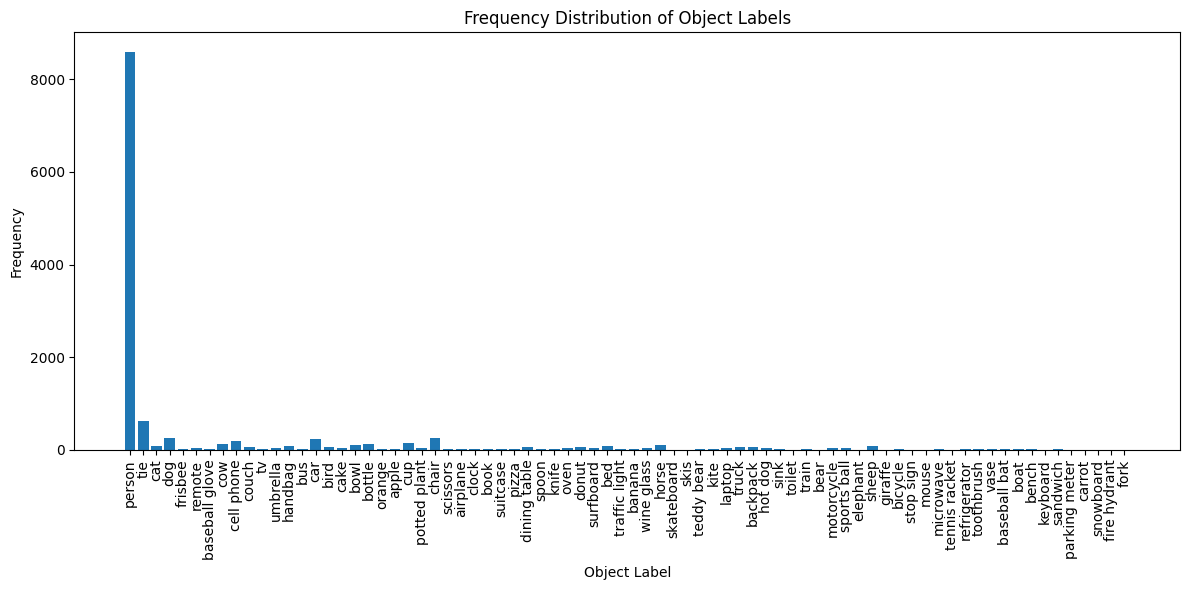

In [ ]:
!pip install matplotlib
import matplotlib.pyplot as plt

total_occurrences = sum(freqs.values())

frequency = {label: count / total_occurrences for label, count in freqs.items()}

most_common_objects = sorted(freqs.items(), key=lambda x: x[1], reverse=True)[:10]

print("Most common objects:")
for label, count in most_common_objects:
    print(f"{label}: {count} occurrences")

plt.figure(figsize=(12, 6))

plt.bar(freqs.keys(), freqs.values())

plt.xticks(rotation=90)

plt.xlabel('Object Label')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Object Labels')

plt.tight_layout()
plt.show()